In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import glob
from tqdm import tqdm_notebook
from joblib import Parallel, delayed
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.metrics import r2_score
from scipy import stats

In [2]:
data_dict = {}

# Before correction

## load data

In [132]:
data_dict = {}
gene_list = []
for f in tqdm_notebook(glob.glob("/home/scai/processing_simoncai/10xfreshfrozen/data/adata/no_filter/*")):
    data = sc.read_h5ad(f)
    f = f.replace('/home/scai/processing_simoncai/10xfreshfrozen/data/adata/no_filter/','').replace('.h5ad','')
#     sc.pp.normalize_total(data)
    data_dict[f] = data
    gene_list = data.var_names

In [133]:
data_dict.keys()

dict_keys(['D0X_FA2_REP_S10_COUNT', 'D1A_FA3_THA_S6_COUNT', 'D1B_FA3_THA_S7_COUNT', 'D1X_FA2_FRE_S1_COUNT', 'D1X_FA2_THA_S5_COUNT', 'D1X_FA3_FRE_S2_COUNT', 'D4X_FA2_FRE_S3_COUNT', 'D4X_FA2_THA_S8_COUNT', 'D4X_FA3_FRE_S4_COUNT', 'D4X_FA3_THA_S9_COUNT', 'FA1', 'FA3'])

## D1A_FA3_THA vs D1B_FA3_THA

In [163]:
a = data_dict['D1A_FA3_THA_S6_COUNT']

a.obs['sample'] = 'D1A_FA3_THA'

b = data_dict['D1B_FA3_THA_S7_COUNT']
b.obs['sample'] = 'D1B_FA3_THA'

combined = a.concatenate(b)

In [135]:
combined.shape

(6876, 33538)

In [137]:
sc.pp.filter_genes(combined, min_counts=1)

In [60]:
# sc.pp.filter_cells(combined, min_counts=3500)
# sc.pp.filter_genes(combined, min_cells=10)

In [138]:
combined.shape

(6876, 23793)

In [143]:
sc.pp.normalize_total(combined)
sc.pp.log1p(combined)
sc.tl.pca(combined)
sc.tl.tsne(combined)

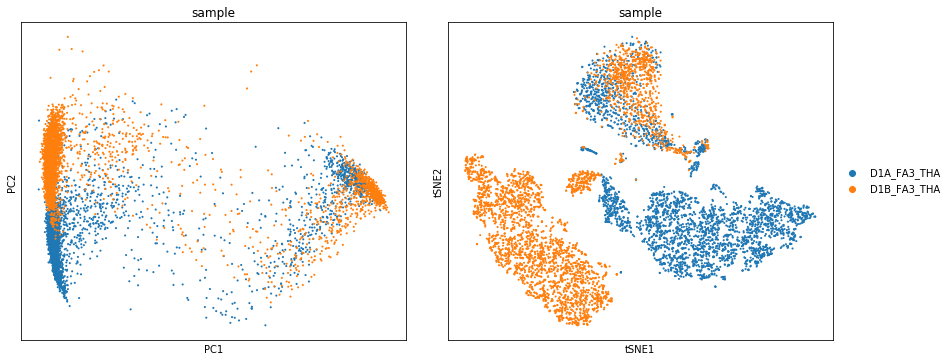

In [144]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
fig.tight_layout()
sc.pl.pca(combined, color='sample', ax=ax[0], legend_loc='best', show=False)
sc.pl.tsne(combined, color='sample', ax=ax[1])

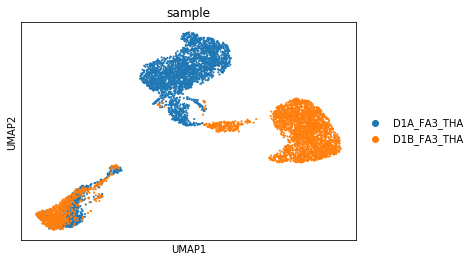

In [147]:
sc.pp.neighbors(combined)
sc.tl.umap(combined)
sc.pl.umap(combined, color='sample')

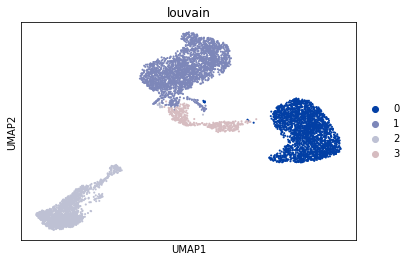

In [151]:
sc.tl.louvain(combined, resolution=0.1)
sc.pl.umap(combined, color='louvain')

## D1X_FA2_FRE vs D1X_FA2_THA

In [89]:
a = data_dict['D1X_FA2_FRE_S1_COUNT']

a.obs['sample'] = 'D1X_FA2_FRE'

b = data_dict['D1X_FA2_THA_S5_COUNT']
b.obs['sample'] = 'D1X_FA2_THA'

combined = a.concatenate(b)

In [90]:
combined.shape

(10228, 33538)

In [91]:
sc.pp.filter_cells(combined, min_counts=3500)
sc.pp.filter_genes(combined, min_cells=10)

In [92]:
combined.shape

(10228, 33538)

In [93]:
sc.pp.normalize_total(combined)
sc.pp.log1p(combined)
sc.tl.pca(combined)
sc.tl.tsne(combined)
# sc.pp.neighbors(combined)
# sc.tl.umap(combined)

... storing 'sample' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


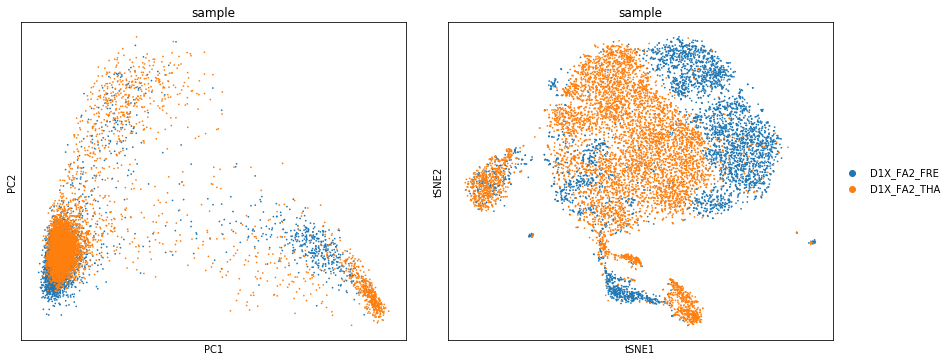

In [94]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
fig.tight_layout()
sc.pl.pca(combined, color='sample', ax=ax[0], legend_loc='best', show=False)
sc.pl.tsne(combined, color='sample', ax=ax[1])

# correction

## D1A_FA3_THA vs D1B_FA3_THA

In [153]:
a = data_dict['D1A_FA3_THA_S6_COUNT']
a.obs['sample'] = 'D1A_FA3_THA'
b = data_dict['D1B_FA3_THA_S7_COUNT']
b.obs['sample'] = 'D1B_FA3_THA'
combined = a.concatenate(b)

In [156]:
sc.pp.filter_genes(combined, min_counts=1)

In [158]:
sc.pp.regress_out(combined, 'sample')

In [159]:
sc.tl.pca(combined)
sc.tl.tsne(combined)

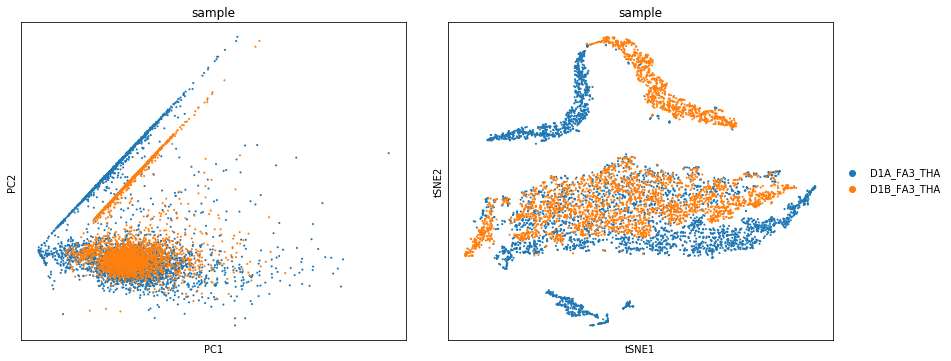

In [160]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
fig.tight_layout()
sc.pl.pca(combined, color='sample', ax=ax[0], legend_loc='best', show=False)
sc.pl.tsne(combined, color='sample', ax=ax[1])

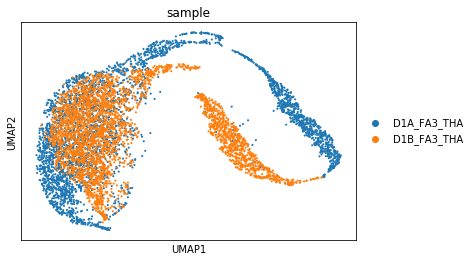

In [162]:
sc.pp.neighbors(combined)
sc.tl.umap(combined)
sc.pl.umap(combined, color='sample')